In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-longevity-factors/LiveLongerData.csv


In [2]:
df = pd.read_csv("/kaggle/input/life-longevity-factors/LiveLongerData.csv")

df.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,Smoking,-10.0,strong,3,Both,negative,10 years gained (against those who continue to...,14 if combined with exercise and eating health...,1,"Khaw KT, et al. (2008). Combined impact of hea...",http://www.washingtonpost.com/wp-dyn/articles/...
1,Sitting Down,-3.0,suggestive,1,Both,negative,for 8-11 hours sitting a day,"No matter how much you exercise, sitting too m...",2,Sydney School of Public Health research paper ...,http://www.ncbi.nlm.nih.gov/pubmed/22450936
2,Too much sleeping,-1.5,suggestive,1,Both,negative,"7 hours ideal, no more than 8 hrs a night",Averaging more than 8 hours sleep a night will...,3,New Scientist,http://www.newscientist.com/article/dn1928-sev...
3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
4,More Pets,3.0,good,2,Both,positive,particularly for elderly. calc assumes that he...,(1) Cats - According to a study by the Minneso...,5,Medical News Today; National Center for Biotec...,http://www.medicalnewstoday.com/articles/98432...


An overview of the data provided

In [3]:
from plotly.express import scatter

scatter(data_frame=df.reset_index(), x='ID', y='Years gained / lost', hover_name='Factor', color='sexes affected',
       size='strength of science as a number').show()

Separate the data by 'sexes affected'

In [4]:
df_male = df[df['sexes affected'] == 'Male']
df_female = df[df['sexes affected'] == 'Female']
df_both = df[df['sexes affected'] == 'Both']

Let's visualize the risks! 

In [5]:
df_male.sort_values('Years gained / lost', inplace=True)
df_male.reset_index(inplace=True)

df_female.sort_values('Years gained / lost', inplace=True)
df_female.reset_index(inplace=True)

df_both.sort_values('Years gained / lost', inplace=True)
df_both.reset_index(inplace=True)

df_female

/tmp/ipykernel_20/2173140370.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/2173140370.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/2173140370.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
1,27,being a woman,5.1,good,2,Female,positive,NaN,"US, 2006 - difference between male and female ...",28,Centres for Disease Control & Prevention,www.cdc.gov/nchs/data/nvsr/nvsr57/nvsr57_14.pdf


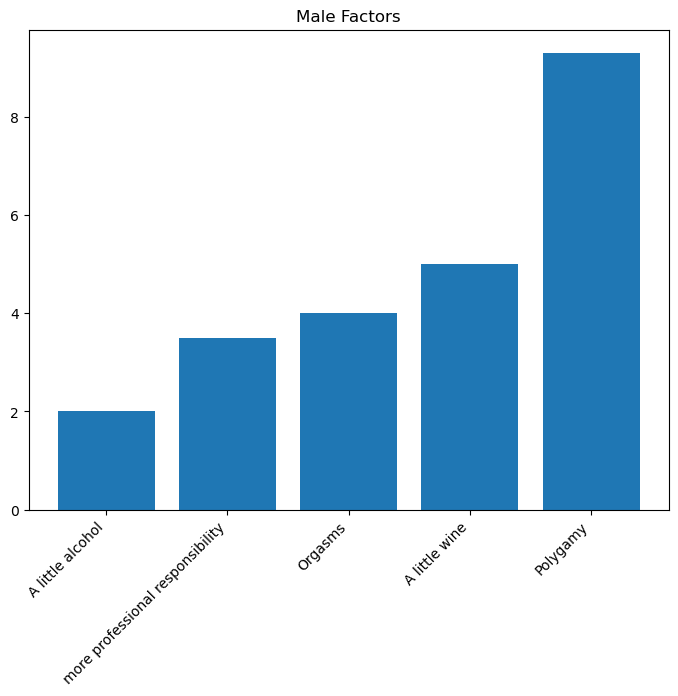

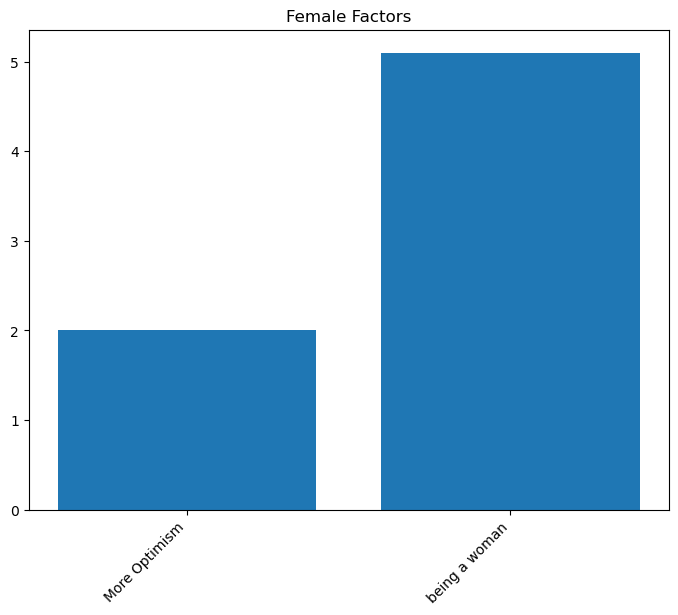

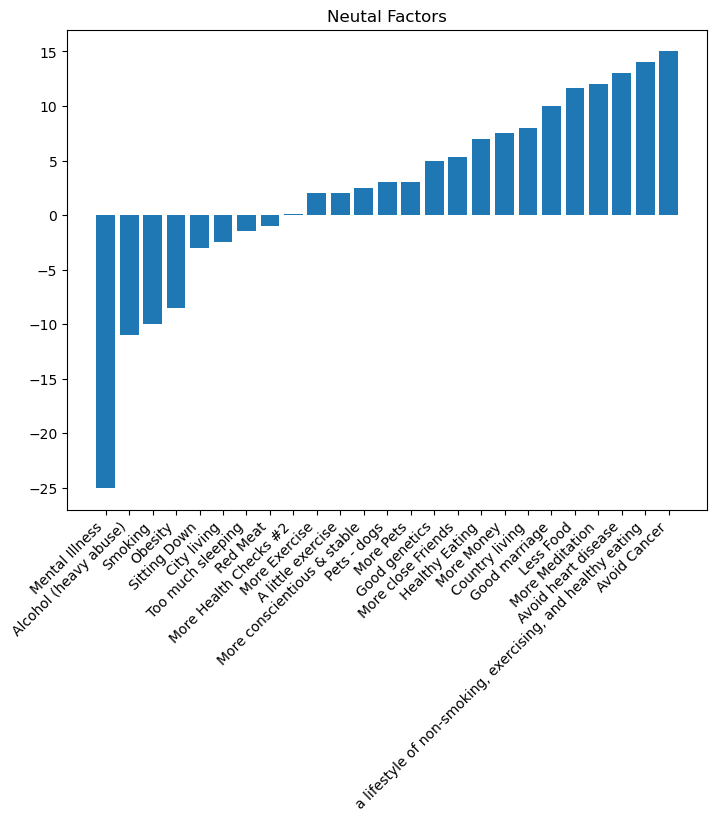

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_male['Factor'],df_male['Years gained / lost'])
plt.title("Male Factors")
plt.xticks(rotation=45, ha='right')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_female['Factor'],df_female['Years gained / lost'])
plt.title("Female Factors")
plt.xticks(rotation=45, ha='right')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_both['Factor'],df_both['Years gained / lost'])
plt.title("Neutal Factors")
plt.xticks(rotation=45, ha='right')
plt.show()


From the above break down there are some key points we can extrapolate from each of the 3 graphs.

*Note* These are simply my conculsions based off of the data and thus will likely not apply to every person

KEY: Slightly Benifitial/Detrimental (Range 1 - 5 yrs), Moderately Benifitial/Detrimental (Range 6 - 10 yrs), Very Benifitial/Detrimental (10+ yrs) 

1. Men's Factors

- A healthy sex life can be moderately benifitial to men
- Men may slightly benifit from light alcohol consumpition
- Men working in managerial roles with more responsibilities may slightly benifit

2. Women's Factors 

- Women perhaps tend to be more optimistic and this slightly increases their life spans

3. Neutral Factors

Negative Factors:
- The most detrimental factor is mental health and by a significant margin
- Classic risk factors such as heavy drinking, smoking, and obesity are also very detrimental to health
- More modern risks arise from living sedintary lifestyles, city living and excessive sleep to a slight degree

Positive Factors:
- Getting more excercise, visiting checkups regularly, and being a bit more conscientious all helps to slighly improve health
- Having pets, close friends and family, more money, living in the country all moderately improve health, likely as they reduce stress and help to stablize and boost mental health 
- Limiting the amount of food you consume and leading a healthy, active lifestyle avoiding smoking are amongst the most benifitial factors
- Avoiding heart disease and cancer make up the most important factors in improving health

Discussion:

Though it is not explicitly shown in this dataset how the various factors are linked to one another, we can see that while gender specific factors may indeed influcence health, there are much more weighted factors which we can take steps to actively manage. These factors affect us all regardless of gender and often times are very much internally linked. For example, leading a healthy and active lifestyle while avoding smoking alone would avoiding issues due to smoking, sedentary lifestyle and obesity. These factors in turn would reduce the rist of developing heart disease, cancer, etc.  

Furthermore, it is important to recognize that many of these factors can simultaneously be occuring such as having a managerial position which increases stress which may lead to dependiences on alcohol, etc. If nothing else, we can see that most of the harmful risk factors can be managed through self control and discipline.  